# Practice Data Analysis in Jupyter Notebook

Practice python data analysis libraries- pandas, numpy, matplotlib taught in CSE445 class.

In [5]:
pwd

'/home/demislam/Desktop/CSE445/jupyter_notebook'

In [2]:
# only need this line in jupyter
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
dataframe = pd.read_csv('../practice_datasets/vgsales.csv')
dataframe.shape

(16598, 11)

# Analyzing the dataset

In [17]:
dataframe.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [23]:
dataframe.describe() # describes only numerical attributes

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [26]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [178]:
# filter dataframe by column values
genre_options = ['Sports', 'Role-Playing']

filtered_dataframe = dataframe[ (dataframe['Genre'].isin(genre_options)) & (dataframe['Year'] >= 2000) ]

filtered_dataframe.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36


# Visualizing the dataset using statistical graphs

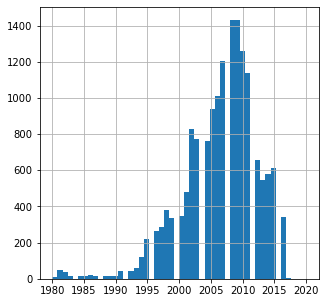

In [50]:
dataframe['Year'].hist(bins = 50, figsize = (5, 5))
plt.show()

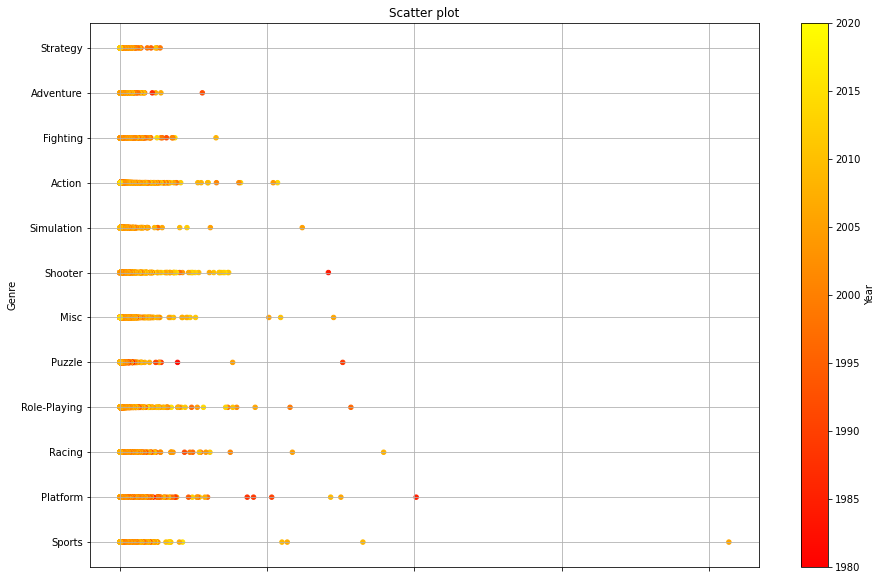

In [100]:
dataframe.plot(
    # general parameters
    kind = 'scatter', x = 'Global_Sales', y = 'Genre',     
    # extra attribute with color
    c = 'Year', colorbar = True, cmap = plt.get_cmap('autumn'), 
    # plot properties
    grid = True, title = 'Scatter plot', figsize = (15, 10)
)

plt.show()

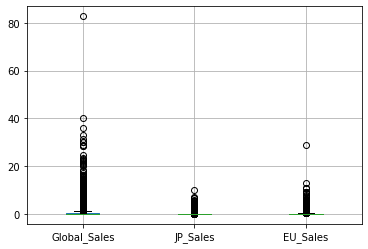

In [167]:
# boxplot using pandas
dataframe.boxplot(['Global_Sales', 'JP_Sales', 'EU_Sales'])
plt.show()

In [156]:
# method to setup box_plot using matplotlib
def setup_box_plot(datalist1, datalist2, datalist3, 
               datalist1Label = 'data1', datalist2Label = 'data2', datalist3Label = 'data3'):
    
    box_plot_data = [datalist1, datalist2, datalist3]
    box_plot_labels = [datalist1Label, datalist2Label, datalist3Label]

    # configure the figure size
    fig = plt.figure(figsize =(10, 5))
    fig.suptitle('Box plot')

    box_plot = plt.boxplot(
                    box_plot_data,
                    vert=False,  # horizontal box alignment
                    patch_artist=True,  # fill with color
                    labels=box_plot_labels
                )

    # fill with colors
    colors = ['pink', 'lightblue', 'lightgreen']
    for patch, color in zip(box_plot['boxes'], colors):
            patch.set_facecolor(color)
            

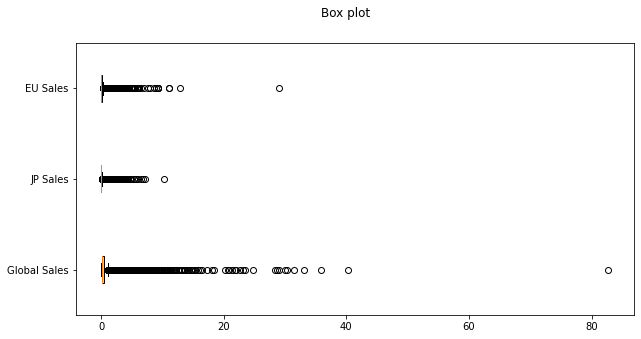

In [168]:
setup_box_plot(
    dataframe['Global_Sales'], dataframe['JP_Sales'], dataframe['EU_Sales'], 
    'Global Sales', 'JP Sales', 'EU Sales'
)

plt.show()

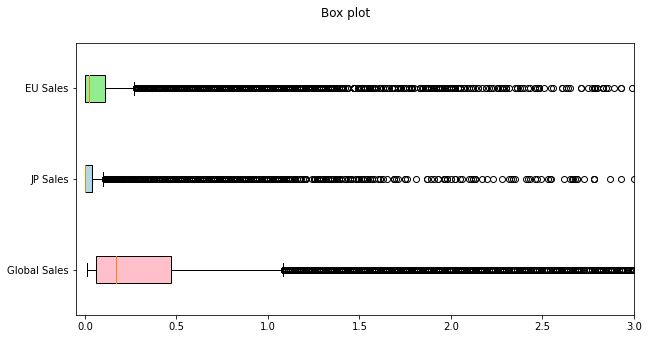

In [169]:
setup_box_plot(
    dataframe['Global_Sales'], dataframe['JP_Sales'], dataframe['EU_Sales'], 
    'Global Sales', 'JP Sales', 'EU Sales'
)   
# clearly view the boxes by editing the x-axis limits
plt.xlim([-0.05, 3])
plt.show()